In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('always')

In [354]:
cols = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df = pd.read_csv('abalone/abalone.data',names=cols)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [355]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<AxesSubplot:xlabel='Sex', ylabel='count'>

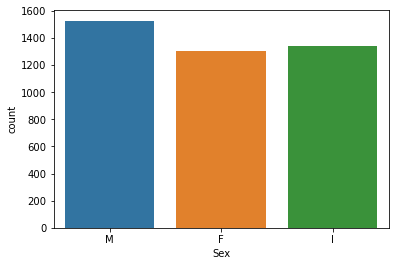

In [356]:
sns.countplot(x = 'Sex', data = df)

array([[<AxesSubplot:xlabel='Length', ylabel='Length'>,
        <AxesSubplot:xlabel='Diameter', ylabel='Length'>,
        <AxesSubplot:xlabel='Height', ylabel='Length'>,
        <AxesSubplot:xlabel='Whole weight', ylabel='Length'>,
        <AxesSubplot:xlabel='Shucked weight', ylabel='Length'>,
        <AxesSubplot:xlabel='Viscera weight', ylabel='Length'>,
        <AxesSubplot:xlabel='Shell weight', ylabel='Length'>],
       [<AxesSubplot:xlabel='Length', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Diameter', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Height', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Whole weight', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Shucked weight', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Viscera weight', ylabel='Diameter'>,
        <AxesSubplot:xlabel='Shell weight', ylabel='Diameter'>],
       [<AxesSubplot:xlabel='Length', ylabel='Height'>,
        <AxesSubplot:xlabel='Diameter', ylabel='Height'>,
        <AxesSubplot:xlabe

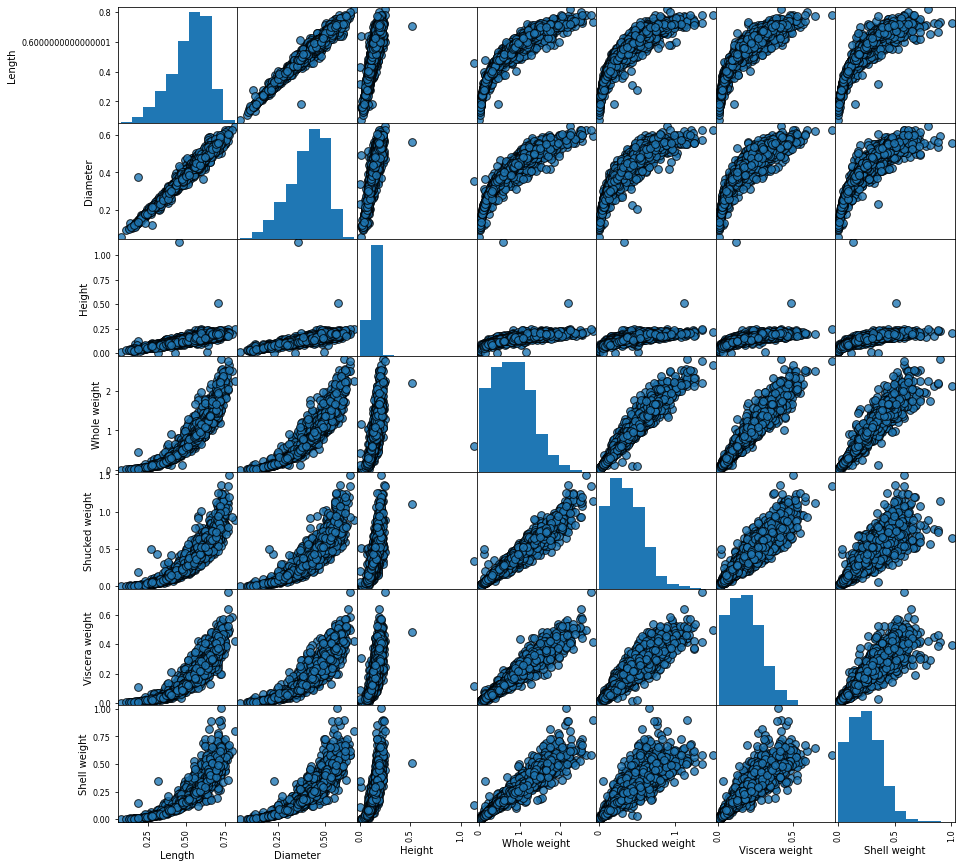

In [357]:
features = df.select_dtypes(include=[np.number]).columns
pd.plotting.scatter_matrix(df.iloc[:,:-1],figsize=(15,15),marker='o',s=60,alpha=0.8,cmap=plt.cm.Set1,edgecolor='k')

<AxesSubplot:>

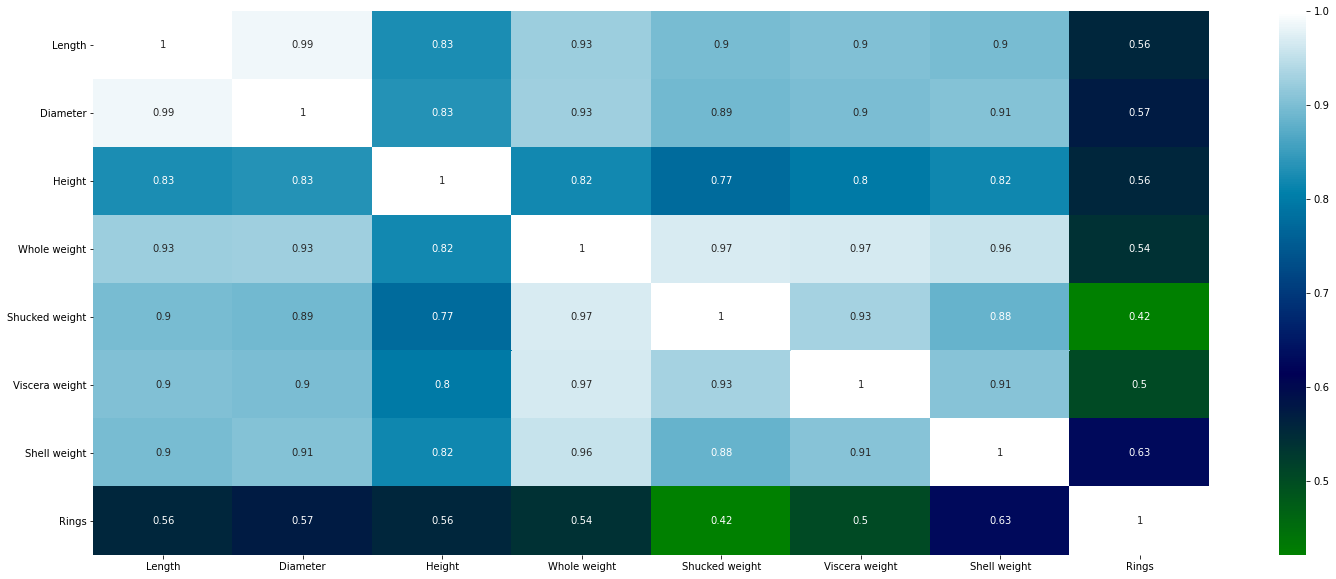

In [358]:
plt.figure(figsize=(25,10))
sns.heatmap(df[features].corr(), annot=True,cmap="ocean")

In [359]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [360]:
X = df.iloc [: , :-1].values
y = df.iloc [: , -1].values

In [361]:
X

array([['M', 0.455, 0.365, ..., 0.2245, 0.101, 0.15],
       ['M', 0.35, 0.265, ..., 0.0995, 0.0485, 0.07],
       ['F', 0.53, 0.42, ..., 0.2565, 0.1415, 0.21],
       ...,
       ['M', 0.6, 0.475, ..., 0.5255, 0.2875, 0.308],
       ['F', 0.625, 0.485, ..., 0.531, 0.261, 0.296],
       ['M', 0.71, 0.555, ..., 0.9455, 0.3765, 0.495]], dtype=object)

In [362]:
y

array([15,  7,  9, ...,  9, 10, 12])

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [364]:
X = df.drop('Sex', axis = 1).values

In [365]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [366]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test= sc.transform(X_test)

Testing score : 0.609
Training score : 0.697
Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.17      0.23      0.19        13
           5       0.38      0.20      0.26        40
           6       0.59      0.70      0.64        63
           7       0.78      0.64      0.70       114
           8       0.75      0.85      0.79       139
           9       0.90      0.97      0.94       152
          10       0.71      0.94      0.80       139
          11       0.41      0.59      0.48       121
          12       0.00      0.00      0.00        93
          13       0.42      0.55      0.47        51
          14       0.08      0.03      0.04        32
          15       0.24      0.23      0.23        22
          16       0.42      0.31      0.36        16
          17       0.12      0.08      0.10        12
          18       0.07      0.17      0.10         6
          1

/Users/sako/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sako/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sako/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


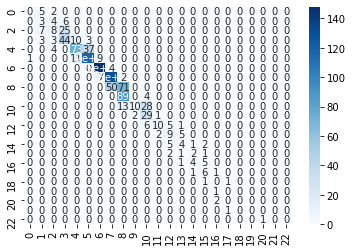

In [367]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(max_iter=5000)
lr.fit (X_train, y_train)
y_pred = lr.predict(X_test)

test_score = lr.score(X_test,y_test)
train_score = lr.score(X_train,y_train)


cfm = confusion_matrix(y_test,y_pred)
sns.heatmap (cfm,annot=True,cmap='Blues')

print("Testing score : {:.3f}".format(test_score))
print("Training score : {:.3f}".format(train_score))
print('Classification Report: \n', classification_report(y_test, y_pred))


/Users/sako/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/sako/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/sako/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/sako/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Text(0, 0.5, 'Average model accuracy')

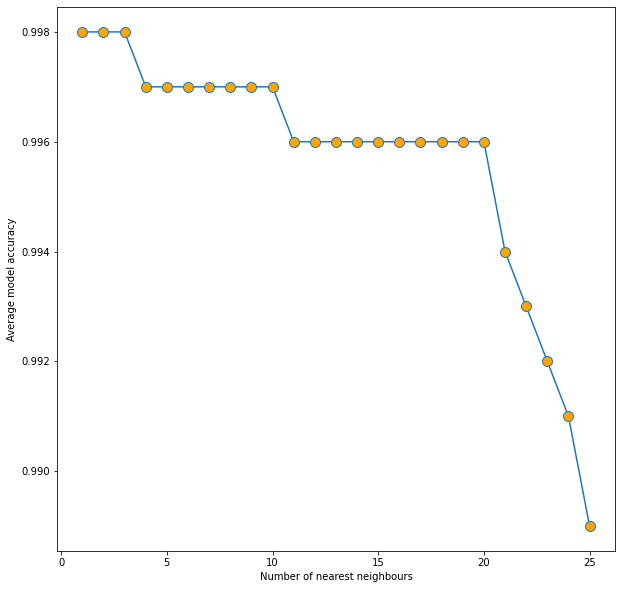

In [368]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
k_list= range (1,26)
ave_scores = []
for k in k_list:
    knc = KNeighborsClassifier(n_neighbors= k)
    knc.fit(X_train, y_train)
    scores = cross_val_score(knc, X,y, cv= 5, scoring="accuracy")
    ave_scores.append(round(scores.mean(),3))

plt.grid   
plt.figure(figsize = (10,10)) 
plt.plot(k_list,ave_scores, marker='o', markerfacecolor='orange', markersize=10)
plt.xlabel("Number of nearest neighbours")
plt.ylabel("Average model accuracy")



Testing score : 0.803
Training score : 0.903
Classification Report: 
               precision    recall  f1-score   support

           3       1.00      0.86      0.92         7
           4       0.80      0.92      0.86        13
           5       0.95      0.93      0.94        40
           6       0.92      0.95      0.94        63
           7       0.97      0.89      0.93       114
           8       0.92      0.91      0.92       139
           9       0.85      0.95      0.89       152
          10       0.81      0.85      0.83       139
          11       0.73      0.79      0.75       121
          12       0.73      0.66      0.69        93
          13       0.67      0.61      0.64        51
          14       0.52      0.47      0.49        32
          15       0.50      0.55      0.52        22
          16       0.44      0.25      0.32        16
          17       0.46      0.50      0.48        12
          18       0.33      0.50      0.40         6
          1

/Users/sako/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sako/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sako/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


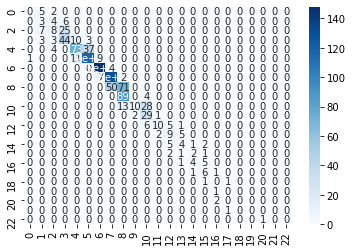

In [369]:
knc = KNeighborsClassifier(n_neighbors= 3)
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)

test_score = knc.score(X_test,y_test)
train_score = knc.score(X_train,y_train)

cfm_knc = confusion_matrix(y_test,y_pred)
sns.heatmap (cfm,annot=True,cmap='Blues')



print("Testing score : {:.3f}".format(test_score))
print("Training score : {:.3f}".format(train_score))
print('Classification Report: \n', classification_report(y_test,y_pred))



Testing score : 0.698
Training score : 0.747
Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.59      0.77      0.67        13
           5       0.82      0.68      0.74        40
           6       0.73      0.81      0.77        63
           7       0.88      0.79      0.83       114
           8       0.74      0.96      0.84       139
           9       0.97      0.91      0.94       152
          10       0.90      1.00      0.95       139
          11       0.46      0.94      0.62       121
          12       0.33      0.16      0.22        93
          13       0.21      0.22      0.21        51
          14       0.00      0.00      0.00        32
          15       0.00      0.00      0.00        22
          16       0.00      0.00      0.00        16
          17       0.00      0.00      0.00        12
          18       0.00      0.00      0.00         6
          1

/Users/sako/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sako/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sako/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


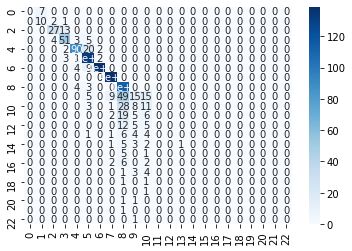

In [370]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 20, max_depth= 5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

test_score = rf.score(X_test,y_test)
train_score = rf.score(X_train,y_train)

cfm = confusion_matrix(y_test,y_pred)

sns.heatmap (cfm,annot=True,cmap='Blues')

print("Testing score : {:.3f}".format(test_score))
print("Training score : {:.3f}".format(train_score))
print('Classification Report: \n', classification_report(y_test,y_pred))


In [371]:
knc_score = cross_val_score (knc,X,y,cv=10,scoring='accuracy')
rf_score = cross_val_score (rf,X,y,cv=10,scoring='accuracy')
print(knc_score)
print(rf_score)

/Users/sako/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/Users/sako/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[0.99521531 0.99760766 0.99760766 0.99760766 0.99521531 0.99760766
 0.99760766 0.99760192 1.         1.        ]
[0.68660287 0.77511962 0.68181818 0.72488038 0.67703349 0.68660287
 0.73684211 0.69304556 0.72422062 0.64268585]


In [372]:
k_list = list(range(1,26))
para_dict= dict(n_neighbors=k_list)
print(para_dict)


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]}


In [373]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knc,para_dict,cv=5,scoring='accuracy',return_train_score=False)
grid.fit(X,y)



/Users/sako/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25]},
             scoring='accuracy')

In [374]:
pd.DataFrame(grid.cv_results_)[["mean_test_score","params"]]

,mean_test_score,params
0,0.998324,{'n_neighbors': 1}
1,0.997845,{'n_neighbors': 2}
2,0.997606,{'n_neighbors': 3}
3,0.997367,{'n_neighbors': 4}
4,0.997127,{'n_neighbors': 5}
5,0.996888,{'n_neighbors': 6}
6,0.997127,{'n_neighbors': 7}
7,0.996888,{'n_neighbors': 8}
8,0.996648,{'n_neighbors': 9}
9,0.996648,{'n_neighbors': 10}


In [375]:
print("Grid Search Best Score: {:.3f}" .format(grid.best_score_))
print(grid.best_params_)


Grid Search Best Score: 0.998
{'n_neighbors': 1}


Text(0, 0.5, "Average model's accuracy")

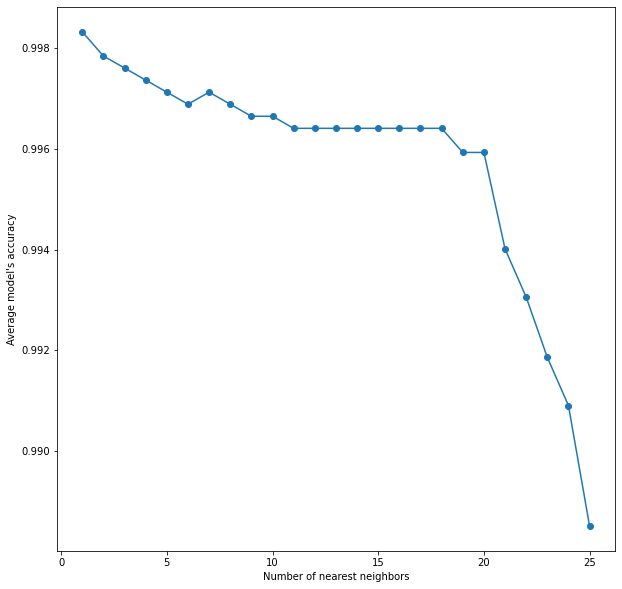

In [376]:
plt.figure(figsize = (10,10)) 
plt.grid
plt.plot(k_list,grid.cv_results_["mean_test_score"],marker="o")
plt.xlabel("Number of nearest neighbors")
plt.ylabel("Average model's accuracy")


In [377]:
k_list = list(range(1,26))
weight_list= ['uniform','distance']
para_dict= dict(n_neighbors=k_list,weights=weight_list)
print(para_dict)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'weights': ['uniform', 'distance']}


In [378]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knc,para_dict,cv=5,scoring='accuracy',return_train_score=False)
grid.fit(X,y)

/Users/sako/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [379]:
pd.DataFrame(grid.cv_results_)[["mean_test_score","params"]]


,mean_test_score,params
0,0.998324,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.998324,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.997845,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.998324,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.997606,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.998324,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.997367,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.998324,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.997127,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.998085,"{'n_neighbors': 5, 'weights': 'distance'}"


In [380]:
print("Grid Search Best Score: {:.3f}" .format(grid.best_score_))
print(grid.best_params_)


Grid Search Best Score: 0.998
{'n_neighbors': 1, 'weights': 'uniform'}
